# Telco Churn Analysis Breakdown

###  By: Xavier Carter

In [1]:
import pandas as pd
import numpy as np
import Aquire
import Prepare
import Explore
import Model
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

### Project Planning

- Create ReadMe.md with data dictionary, business goals, hypothesis and hypothesis testing results
- Aquire information from database 
- Prep and clean the data for more info for more visualizations, document findings and take
- Use visualizations to find possible MVP's, further my MVP testing with statstical analysis
- Create Hypothesis for each mvp,  alpha and find if rejecting the hypothesis is logical
- Create Baseline Accuracy , document positive case and and what measure of accuracy should take precedence
- Train classification models evaluate results
- Choose best preforming model for test case , document findings
- Create csv that documents the customer ID, their churn status, predicted churn status and probability of churn
- Document conclusions / Take aways and next steps

### Executive Summary - Conclusions and next steps

- Models used were Logistic regression, Decision Tree, Random Forest, KNneigbors, all preformed well above the baseline accuracy for the MVPs.
* MVP includes
    * Fiber optic
    * Electronic check 
    * 'monthly_charges
    * tenure
    * Two year'
    * 'None' (No Internet)
- I chose my random forest as it suceeds the best in recall at 94% of the time but out preforms the baseline accuracy as well.
- Next steps would be to find solutions to make sure our high risk customers do not churn.

### Aquire Data

Get data from the telco_churn database

In [2]:
original_df = Aquire.get_telco_data()

In [3]:
#peek at data
original_df.sample(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
4270,4102-OQUPX,Male,1,Yes,No,1,Yes,Yes,2,No,...,No,1,Yes,1,74.40,74.4,Yes,Month-to-month,Fiber optic,Electronic check
2825,9541-ZPSEA,Male,0,Yes,Yes,68,Yes,No,2,Yes,...,No,3,No,4,80.35,5375.15,No,Two year,Fiber optic,Credit card (automatic)
3519,0581-MDMPW,Female,0,No,No,24,Yes,Yes,2,No,...,No,1,Yes,4,88.95,2072.75,No,Month-to-month,Fiber optic,Credit card (automatic)


In [4]:
Aquire.summerize_df(original_df)

-----shape------
7043 rows and 24 columns
---info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_

#### Aquire - Takeaways
- sql query used made duplicate columns, should remove redundant columns
- total charges is seen as an object but needs to be a float
- catagorical ML algorithms use binary variables, each categorcial variable needs to be a 0 or 1
- No scaling required for continous variables.
- handle any nulls
- create dummies for any non-binary catergorical variables

### Prepare Data

In [5]:
#prep original data so it can be put into a binary_df
original_df_copy = Prepare.prep_original(original_df)
#create binary dataframe from orignal
binary_df = Prepare.prep_for_model(original_df_copy)

#### Process /Takeaways
- Total charges was converted to a float type as opposed to an object type
- 11 null values found in total charges, since total charges is just a running total and the people who were missing there running total were only ncustomers with a tenure of 0, we can make the case that these are just new customers that havnt posted ther first payment yet,
     * filling these values with a 0 will is justifiable as tenure is calculated by total charges divided by monthly charges
- Each binary catagorical was converted to its binary counter part (1=male, 0=female , 1=yes, 0 = no).
- Each multi catagorical was converted to binary using get_dummies, the original column was removed.

### Explore Data

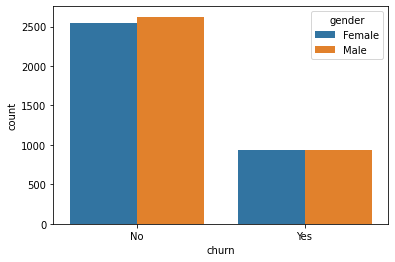

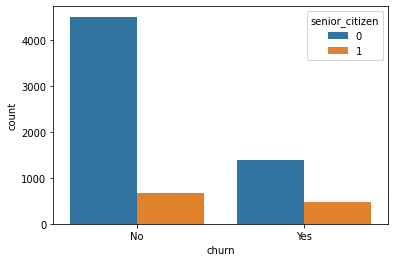

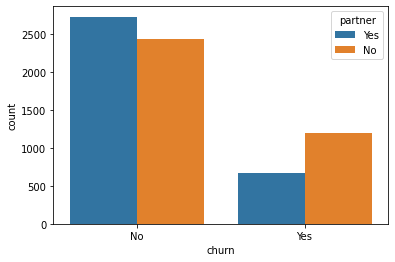

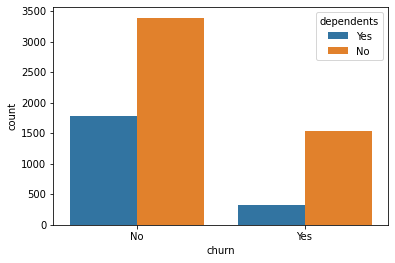

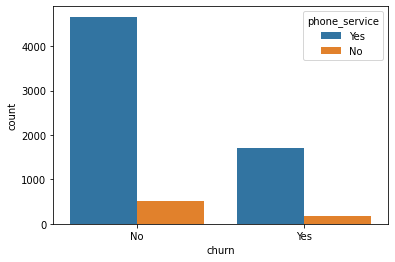

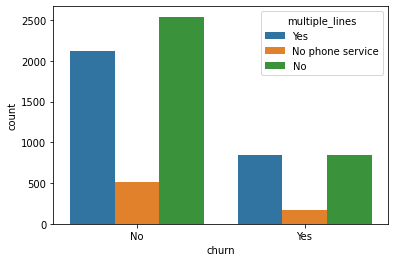

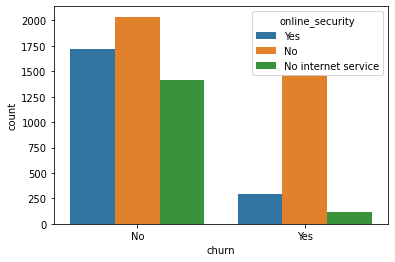

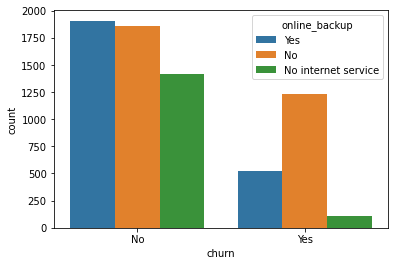

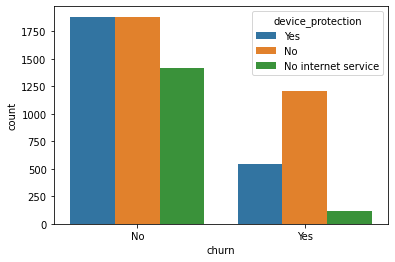

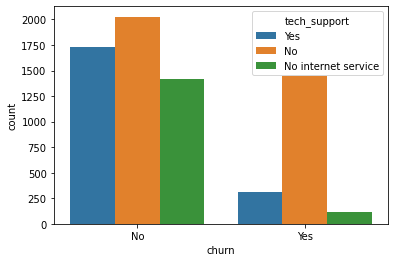

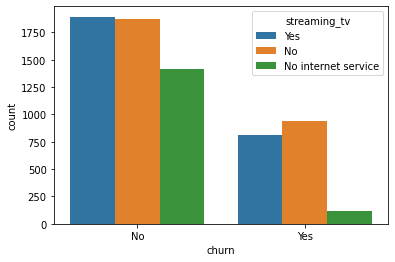

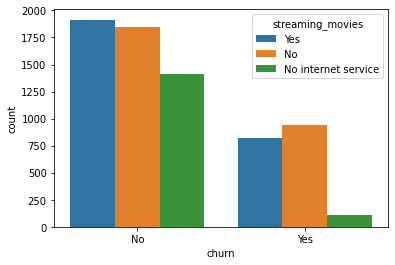

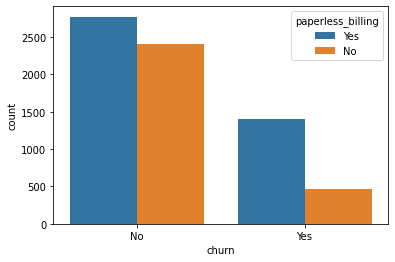

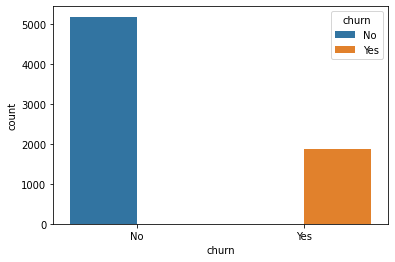

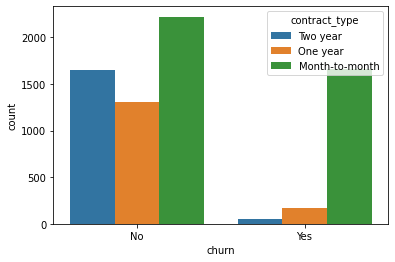

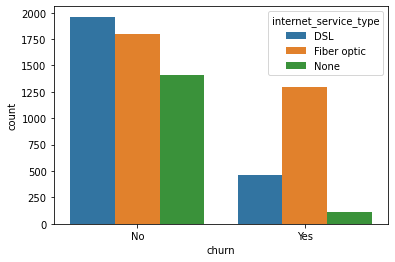

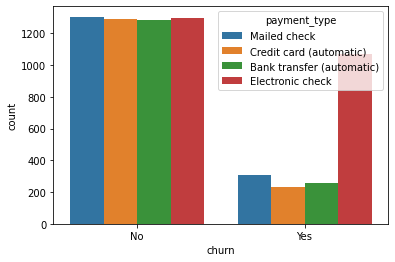

In [6]:
#catagorical variables in relation to churn
Explore.get_cat_stats(original_df)

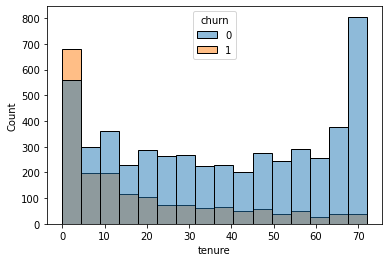

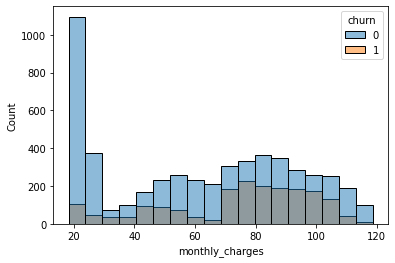

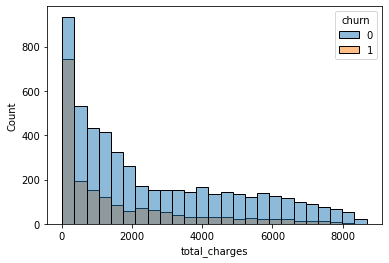

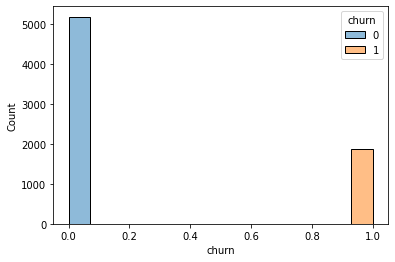

In [7]:
Explore.get_con_stats(binary_df)

<AxesSubplot:title={'center':'Feautures  Correlating with Churn'}>

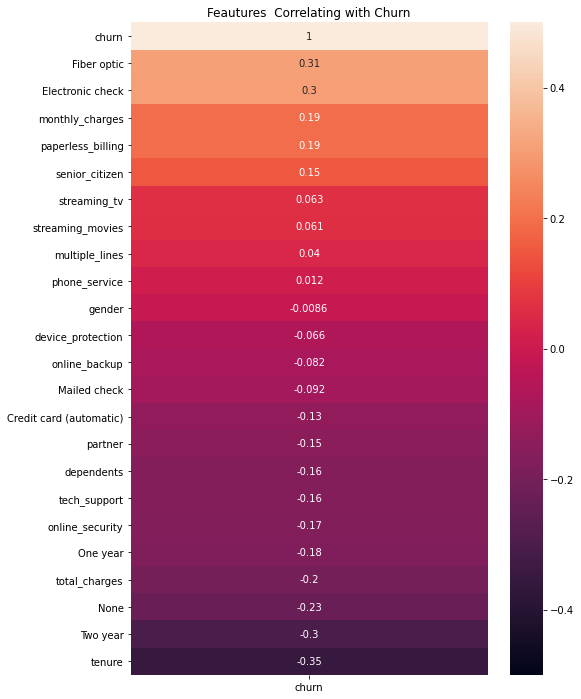

In [8]:
Explore.get_churn_heatmap(binary_df)

#### Takeaways
- Choosing  MVPs for churn
    * positive correlation, top 3 = fiber optic, electronic_check, monthly_charges
    * negetive correlation, top 3 = tenure, two_year, none(no_internet)
- Testing for corralation with statistical tests
     * alpha = 0.5

##### Statistical Analysis

In [9]:
alpha = 0.5

In [10]:
chi_var = ['Fiber optic', 'Electronic check', 'Two year', 'None']
t_test = ['tenure', 'monthly_charges']

In [11]:
Explore.get_chi_test(chi_var, binary_df, alpha)

churn           0     1
Fiber optic            
0            3375   572
1            1799  1297
Null Hyothesis: Fiber optic does not correlate to churn
Alternative hypothesis: Fiber optic does correlate to churn
p value 4.940476033744708e-147 is less than alpha 0.5 , we reject our null hypothesis
-------------------------------------
churn                0     1
Electronic check            
0                 3880   798
1                 1294  1071
Null Hyothesis: Electronic check does not correlate to churn
Alternative hypothesis: Electronic check does correlate to churn
p value 2.5280301640753998e-141 is less than alpha 0.5 , we reject our null hypothesis
-------------------------------------
churn        0     1
Two year            
0         3527  1821
1         1647    48
Null Hyothesis: Two year does not correlate to churn
Alternative hypothesis: Two year does correlate to churn
p value 1.3376802517066984e-141 is less than alpha 0.5 , we reject our null hypothesis
----------------

In [12]:
Explore.get_t_test(t_test, binary_df, alpha)

Null Hypothesis: as tenure increases overtime ,churn is not affected
Alternative hypothesis: as tenure increases overtime ,churn is affected
p value 0.0 is less than alpha 0.5 , we reject our null hypothesis
-------------------------------------
Null Hypothesis: as monthly_charges increases overtime ,churn is not affected
Alternative hypothesis: as monthly_charges increases overtime ,churn is affected
p value 0.0 is less than alpha 0.5 , we reject our null hypothesis
-------------------------------------


#### Takeaways
-  All mvp can be used as they all rejected the their null hypothesis.

## Model Data

In [13]:
train, validate, test = Prepare.telco_split(binary_df)

In [14]:
train.shape , validate.shape, test.shape

((3943, 25), (1691, 25), (1409, 25))

In [15]:
x_col = ['Fiber optic','Electronic check', 'monthly_charges', 'tenure', 'Two year', 'None']
y_col = 'churn'

X_train = train[x_col]
y_train = train[y_col]

X_validate = validate[x_col]
y_validate = validate[y_col]

X_test = test[x_col]
y_test = test[y_col]